##**Install and Import Required Libraries**

In [ ]:
# Install required libraries (easily installed on Google colab)
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install descartes --quiet
!pip install geopandas
!pip install osmnx
!pip install plotly_express


Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,201 kB/s)
Selecting previously unselected package pytho

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 4.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


In [ ]:
#Import Libraries

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import networkx as nx
import osmnx as ox

import math
import heapq
from heapq import heappush, heappop

ox.settings.log_console=True
ox.settings.use_cache=True

##**Explore Map of Location for Case Study**

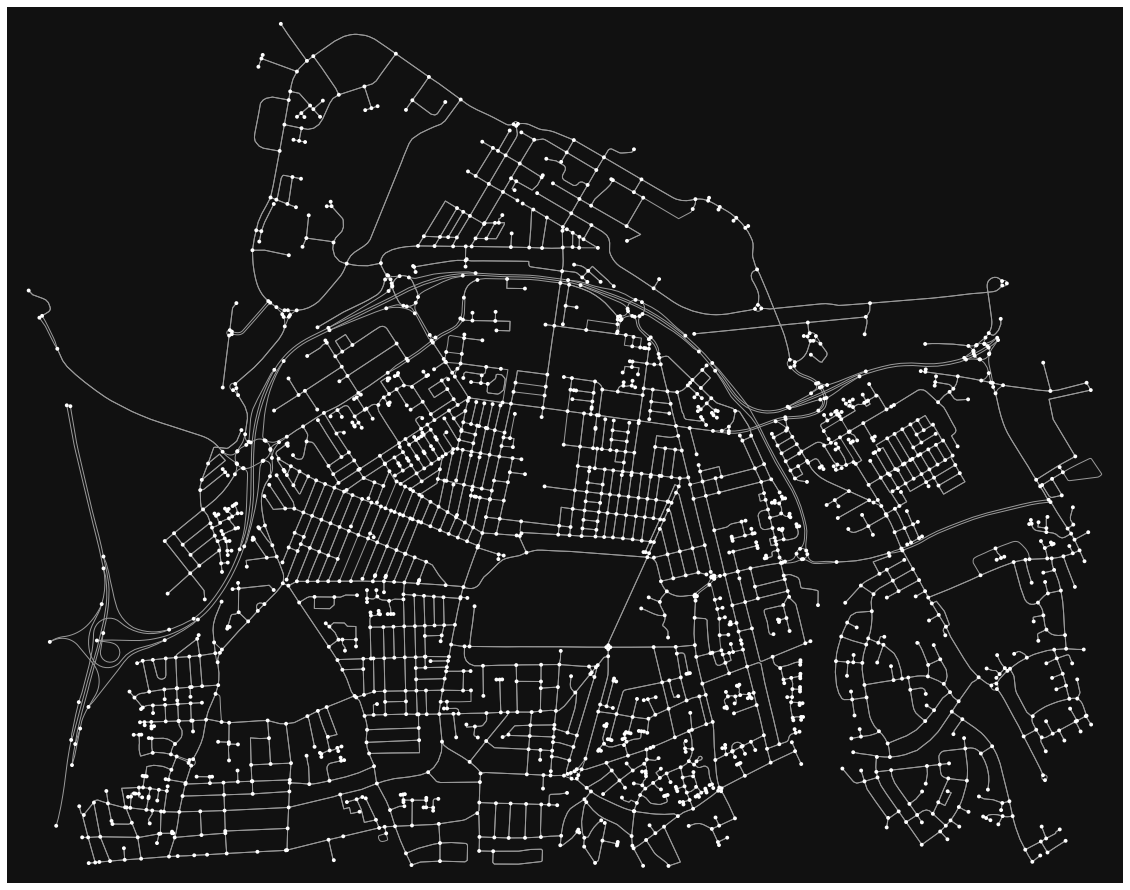

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot: >)

In [ ]:
G = ox.graph_from_address("Middlesbrough", dist=2500, network_type="drive")
ox.plot_graph(G, figsize=(20, 20))

In [ ]:
#Add edge speed and travel time information 

G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
#Check number of nodes
len(G)

2146

In [ ]:
# first 5 edges
list(G.edges(keys=True, data=True))[0:5]

[(2742529,
  694291381,
  0,
  {'osmid': 41401939,
   'lanes': '2',
   'ref': 'B6541',
   'name': 'Stockton Road',
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'oneway': False,
   'reversed': True,
   'length': 56.726,
   'speed_kph': 48.3,
   'travel_time': 4.2}),
 (2742529,
  694291279,
  0,
  {'osmid': 55248227,
   'name': 'Corder Road',
   'highway': 'residential',
   'oneway': False,
   'reversed': False,
   'length': 67.008,
   'speed_kph': 41.5,
   'travel_time': 5.8}),
 (2742529,
  583502147,
  0,
  {'osmid': 41401939,
   'lanes': '2',
   'ref': 'B6541',
   'name': 'Stockton Road',
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'oneway': False,
   'reversed': False,
   'length': 175.27,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f065c776610>,
   'speed_kph': 48.3,
   'travel_time': 13.1}),
 (7630514,
  600748422,
  0,
  {'osmid': 4020789,
   'ref': 'B1272',
   'name': 'Linthorpe Road',
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'o

In [ ]:
# first 5 nodes
list(G.nodes(data=True))[0:5]

[(2742529, {'y': 54.5675608, 'x': -1.262172, 'street_count': 3}),
 (7630514, {'y': 54.5675702, 'x': -1.2398263, 'street_count': 4}),
 (7630515, {'y': 54.5689969, 'x': -1.2392771, 'street_count': 3}),
 (7630516,
  {'y': 54.5707834,
   'x': -1.2385956,
   'highway': 'traffic_signals',
   'street_count': 4}),
 (7630517, {'y': 54.5717886, 'x': -1.2382137, 'street_count': 3})]

In [ ]:
# last 5 nodes
list(G.nodes(data=True))[-5:]

[(9815513289, {'y': 54.5754269, 'x': -1.2032083, 'street_count': 4}),
 (9815513291, {'y': 54.5753588, 'x': -1.2031254, 'street_count': 4}),
 (9815513292, {'y': 54.5750157, 'x': -1.2041346, 'street_count': 4}),
 (9815513296, {'y': 54.5751046, 'x': -1.204204, 'street_count': 4}),
 (9815513299, {'y': 54.5752165, 'x': -1.2042261, 'street_count': 3})]

In [ ]:
#Print steet names from first 15 edges
tlist = list(G.edges(keys=True, data=True))[0:15]
for i in tlist:
  for j in i[3].items():
   if j[0] == 'name':
     print(j)

('name', 'Stockton Road')
('name', 'Corder Road')
('name', 'Stockton Road')
('name', 'Linthorpe Road')
('name', 'Linthorpe Road')
('name', 'Albert Terrace')
('name', 'Gresham Road')
('name', 'Linthorpe Road')
('name', 'Linthorpe Road')
('name', 'Linthorpe Road')
('name', 'Southfield Road')
('name', 'Princes Street')
('name', 'Linthorpe Road')
('name', 'Linthorpe Road')


In [ ]:
# Define origin/destination nodes

# Origin Node: Outskirts of Middlesbrough
G.nodes()[435101297]



{'y': 54.5537453, 'x': -1.2675897, 'street_count': 3}

In [ ]:
# Destination Node: Teesside Universty Juntion
G.nodes()[7634324]

{'y': 54.5707166, 'x': -1.2376335, 'street_count': 3}

In [ ]:
# Get origin and target nodes (Outskirts of town to Teesside University Junction)
origin_node = ox.distance.nearest_nodes(G, -1.2675897, 54.5537453) 
target_node = ox.distance.nearest_nodes(G, -1.2376335, 54.5707166) # Teesside University


In [ ]:
# find optimal route between these nodes then plot it (with weight='length')

best_route_by_length = nx.shortest_path(G, source=435101297, target=7634324, weight='length')
#best_route_by_length = nx.shortest_path(G, source=435101297, target=308037175, weight='length')


#Print list of nodes in best_route_by_length
print(best_route_by_length)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 292265629, 292259969, 2136776739, 435100619, 435100833, 2136776730, 435100785, 295211131, 694179873, 294770259, 27699353, 571399376, 294770258, 694183013, 694189935, 694189930, 292262209, 292261265, 292261837, 295704999, 292261799, 694082436, 694082438, 694082439, 694082443, 694082445, 817174367, 815505157, 7639030, 7639046, 1143758860, 7641669, 7641653, 7641655, 7641656, 7641622, 7641642, 7641619, 1143758817, 7641649, 7641616, 7630516, 7634324]


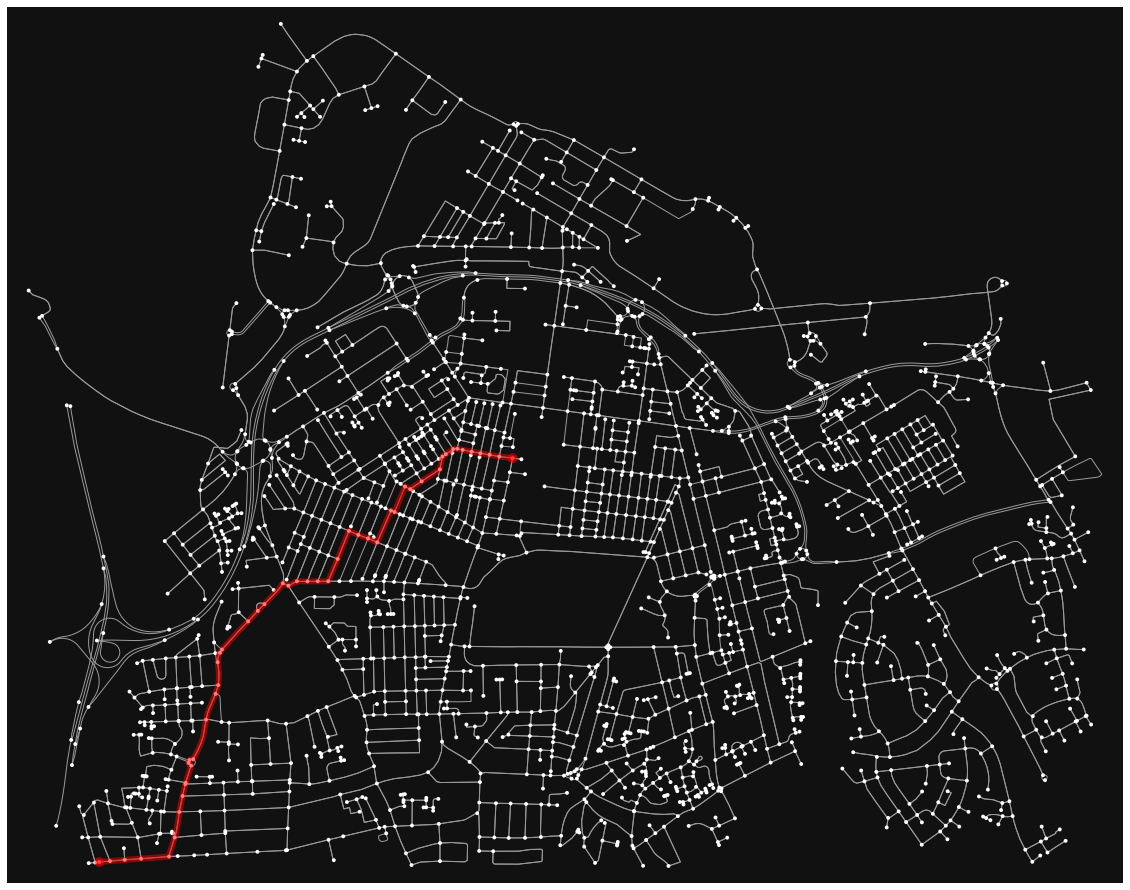

In [ ]:
# # plot optimal route by distance
fig, ax = ox.plot_graph_route(G, best_route_by_length, figsize=(20, 20),route_linewidth=6)

In [ ]:
# find the route between these nodes then plot it (with weight='travel_time')

best_route_by_travel_time = nx.shortest_path(G, source=435101297, target=7634324, weight='travel_time')
#best_route_by_travel_time = nx.shortest_path(G, source=435101297, target=308037175, weight='travel_time')


#Print list of nodes in best_route_by_travel_time
print(best_route_by_travel_time)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 740540318, 292265495, 292260670, 695102216, 292256231, 446771647, 27738677, 27738675, 293185051, 2196476485, 2196476490, 295872340, 288980160, 288980158, 295872820, 292257260, 288980140, 694082342, 2061046703, 2061046713, 600748420, 600748422, 7630514, 7634295, 1698348554, 7630515, 27766970, 7634328, 7630516, 7634324]


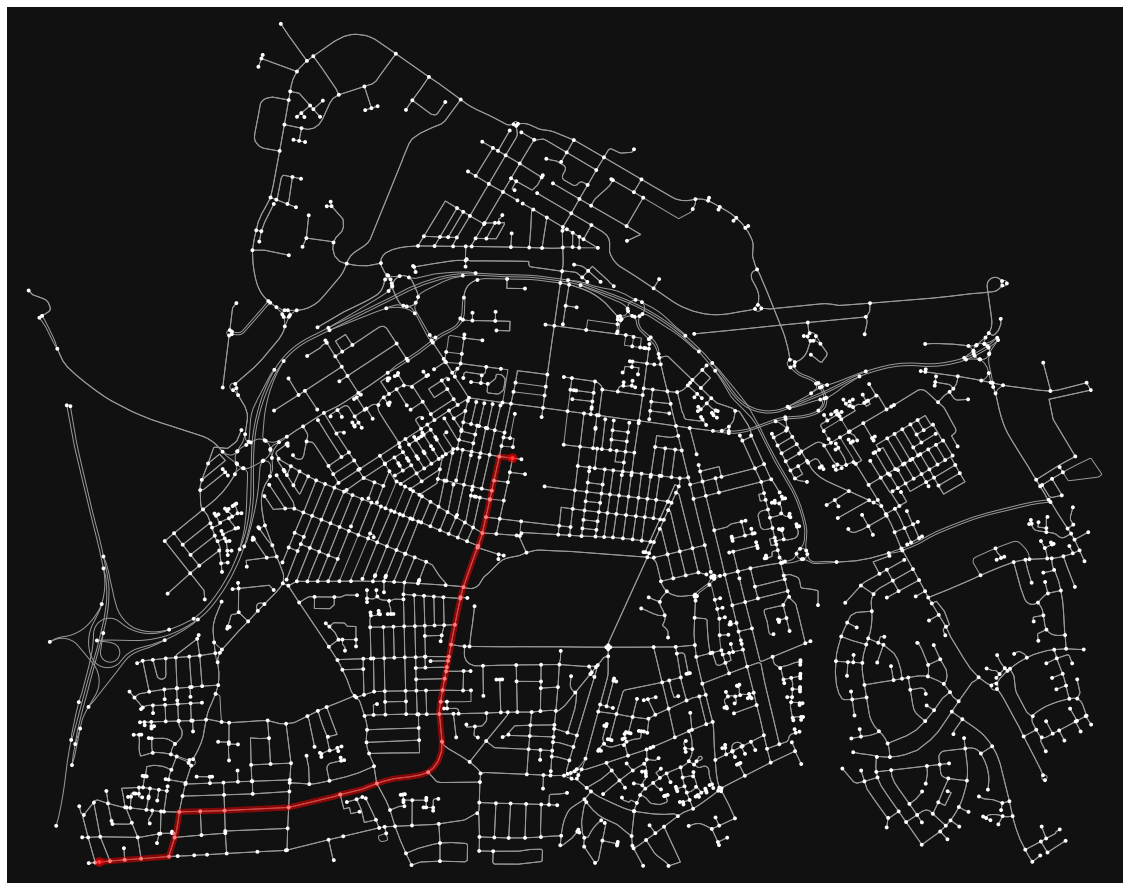

In [ ]:
# plot optimal route by travel_time
fig, ax = ox.plot_graph_route(G, best_route_by_travel_time, figsize=(20, 20),route_linewidth=6)

In [ ]:
# Get Coordinaates from Origin Node
G.nodes()[435101297]

{'y': 54.5537453, 'x': -1.2675897, 'street_count': 3}

In [ ]:
# Get Coordinaates from Destination Node
G.nodes()[7634324]

{'y': 54.5707166, 'x': -1.2376335, 'street_count': 3}

In [ ]:
# Get origin and target nodes (Outskirts of town to Teesside University Junction)
origin_node = ox.distance.nearest_nodes(G, -1.2675897, 54.5537453) 
target_node = ox.distance.nearest_nodes(G, -1.2376335, 54.5707166) # Teesside University


In [ ]:
#see the travel time for the whole route
travel_time = nx.shortest_path_length(G, origin_node, target_node, weight='travel_time')
print(round(travel_time))

252


In [ ]:
#Create lists for dataframe with coordinates, length and travel time data from one node to the next along the best route

node_start = []
node_end = []
X_to = []
Y_to = []
X_from = []
Y_from = []
length = []
travel_time = []

#Fetch data from from nodes on desired route to lists
for u, v in zip(best_route_by_travel_time[:-1], best_route_by_travel_time[1:]):
    node_start.append(u)
    node_end.append(v)
    length.append(round(G.edges[(u, v, 0)]['length']))
    travel_time.append(round(G.edges[(u, v, 0)]['travel_time']))
    X_from.append(G.nodes[u]['x'])
    Y_from.append(G.nodes[u]['y'])
    X_to.append(G.nodes[v]['x'])
    Y_to.append(G.nodes[v]['y'])

In [ ]:
#Create dataframe with coordinates, length and travel time data from one node to the next along the best route
df = pd.DataFrame(list(zip(node_start, node_end, X_from, Y_from,  X_to, Y_to, length, travel_time)), 
               columns =["node_start", "node_end", "X_from", "Y_from",  "X_to", "Y_to", "length", "travel_time"]) 
df.head()

node_start   node_end    X_from     Y_from      X_to       Y_to  length  \
0   435101297  694251046 -1.267590  54.553745 -1.266816  54.553782      50   
1   694251046  694251011 -1.266816  54.553782 -1.265750  54.553837      69   
2   694251011  435101184 -1.265750  54.553837 -1.264560  54.553884      77   
3   435101184  435101039 -1.264560  54.553884 -1.262537  54.553975     131   
4   435101039  435101036 -1.262537  54.553975 -1.262126  54.554777      93   

   travel_time  
0            4  
1            6  
2            7  
3           11  
4            7

In [ ]:
#Reset index of dataframe for easy reference of nodes in plots
df.reset_index(inplace=True)
df.head()

index  node_start   node_end    X_from     Y_from      X_to       Y_to  \
0      0   435101297  694251046 -1.267590  54.553745 -1.266816  54.553782   
1      1   694251046  694251011 -1.266816  54.553782 -1.265750  54.553837   
2      2   694251011  435101184 -1.265750  54.553837 -1.264560  54.553884   
3      3   435101184  435101039 -1.264560  54.553884 -1.262537  54.553975   
4      4   435101039  435101036 -1.262537  54.553975 -1.262126  54.554777   

   length  travel_time  
0      50            4  
1      69            6  
2      77            7  
3     131           11  
4      93            7

In [ ]:
origin = df[df["node_start"] == origin_node]
destination = df[df["node_end"] == target_node]

In [ ]:
origin

index  node_start   node_end   X_from     Y_from      X_to       Y_to  \
0      0   435101297  694251046 -1.26759  54.553745 -1.266816  54.553782   

   length  travel_time  
0      50            4

In [ ]:
destination

index  node_start  node_end    X_from     Y_from      X_to       Y_to  \
35     35     7630516   7634324 -1.238596  54.570783 -1.237634  54.570717   

    length  travel_time  
35      62            5

In [ ]:
#Plot of optimal path with node size indicating travel time between nodes using open-street-map layout
px.set_mapbox_access_token("pk.eyJ1Ijoic21vanVyaSIsImEiOiJjbGFlbGZhNXkwdnVmM29sZHNnbDVmZzJnIn0.vKkFpaOwQsYZpJFbaJJhKA")
fig = px.scatter_mapbox(df, 
                        lon = df['X_from'],
                        lat = df['Y_from'],
                        zoom = 14,
                        size = df['travel_time'],
                        width = 1200,
                        height = 1000,
                        title = 'Middlesbrough Drive Path Optimization'
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()
print('plot complete.')

plot complete.


In [ ]:
#Plot of optimal path with node size indicating distance between nodes

px.set_mapbox_access_token("pk.eyJ1Ijoic21vanVyaSIsImEiOiJjbGFlbGZhNXkwdnVmM29sZHNnbDVmZzJnIn0.vKkFpaOwQsYZpJFbaJJhKA")
px.scatter_mapbox(df, lon= df['X_from'], lat=df['Y_from'], 
                  zoom=14, 
                  width = 1200,
                  height = 1000,
                  size = df['length'],
                  title = 'Middlesbrough Drive Path Optimization',
                  mapbox_style="streets")

In [ ]:
#Plot of optimal path with trace line between nodes

fig = px.scatter_mapbox(df, lon= df['X_from'], lat=df['Y_from'],  width=1200, height=800, zoom=13.5,mapbox_style="streets")
fig.add_trace(px.line_mapbox(df, lon= df['X_from'], lat=df['Y_from']).data[0])



In [ ]:
#Plot of optimal path with animation of drive path between origin  and target nodes

fig = px.scatter_mapbox(df, lon= "X_from", lat="Y_from", zoom=13, width=1200, height=800, animation_frame="index",mapbox_style="streets")
fig.data[0].marker = dict(size = 12, color="black")
fig.add_trace(px.scatter_mapbox(origin, lon= "X_from", lat="Y_from").data[0])
fig.data[1].marker = dict(size = 15, color="red")
fig.add_trace(px.scatter_mapbox(destination, lon= "X_from", lat="Y_from").data[0])
fig.data[2].marker = dict(size = 15, color="green")
fig.add_trace(px.line_mapbox(df, lon= "X_from", lat="Y_from").data[0])
fig

##**Explore Path Optimization with Search Algorithms**

In [ ]:
#Two extreme ends of the graph were chosen to test performance of different search algorthms

# Get origin node (1st extreme end of graph)
origin_node = ox.distance.nearest_nodes(G, -1.2675897, 54.5537453) 

# Get destination node (2nd extreme end of graph)
destination_node = ox.distance.nearest_nodes(G, -36.126690, 146.864320) 

print('Origin node: ',origin_node)
print('Destination node: ',destination_node)

Origin node:  435101297
Destination node:  308037175


### **BFS Algorithm:** Optimal path between specified start node and end nodes  

In [ ]:
# Find shortest path between 2 nodes of a graph 
# using a breadth-first search algorithm

def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == goal:
        return "Goal found: start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # Return None if no path was found between the 2 nodes
    return None
 


In [ ]:
# Create optimal path with BFS
bfs_path = bfs_shortest_path(G, origin_node, destination_node)
print(bfs_path)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 435101034, 740540318, 292265495, 292260670, 695102216, 292256231, 446771647, 27738677, 291757065, 291757070, 368938633, 368934261, 852613332, 368934959, 368938392, 695109639, 412975738, 292257406, 292257407, 7632811, 7634256, 7634257, 7634267, 7634268, 7634298, 7634317, 7634313, 7635923, 7635922, 7638276, 7638278, 695127353, 1194138825, 695121266, 618569558, 569940189, 569940194, 833956663, 27724532, 569940235, 569940226, 537673171, 268775051, 307379660, 307379358, 307379373, 308036503, 308036765, 308037175]


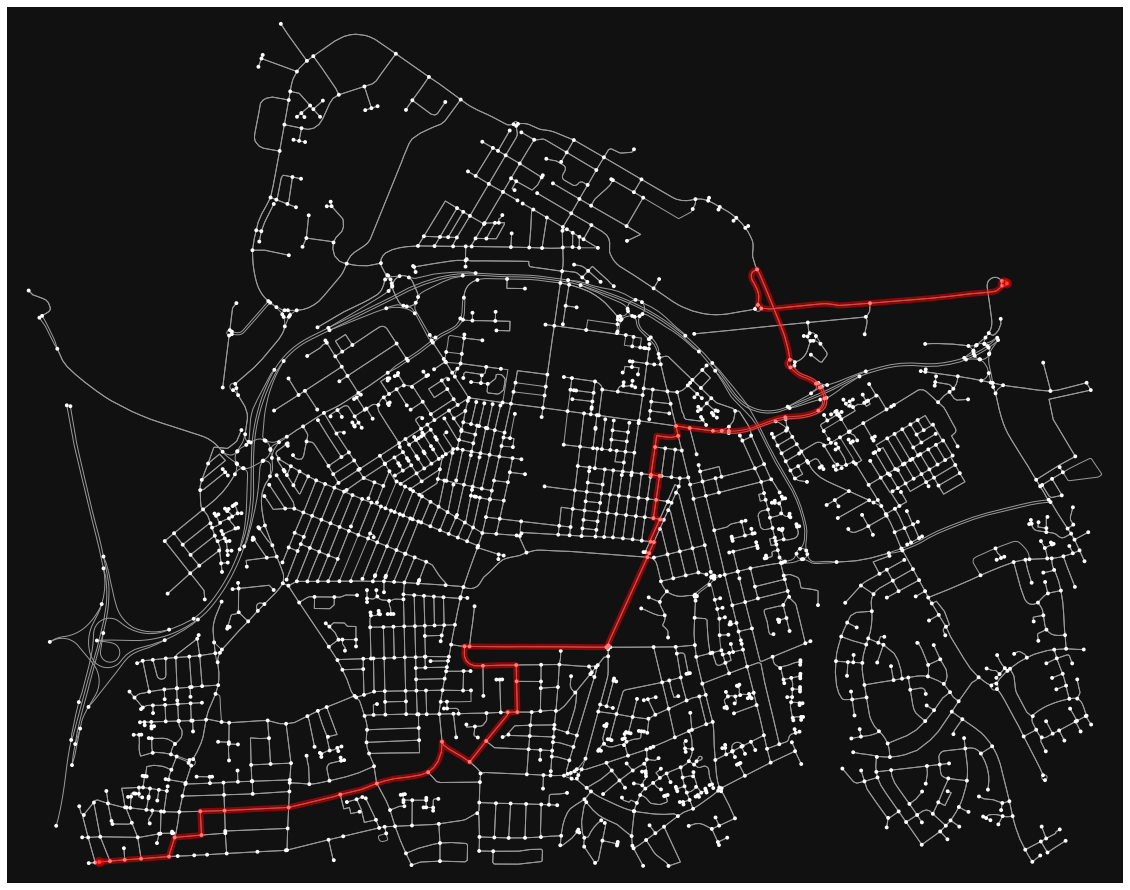

In [ ]:
# plot BFS route 
fig, ax = ox.plot_graph_route(G, bfs_path, figsize=(20, 20),route_linewidth=6)

### **DFS Algorithm:** Optimal path between specified start node and end nodes 

In [ ]:
# Function to find the shortest path between two nodes
# using a depth-first search algorithm

def dfs_shortest_path(graph, start, goal):
    # Keep track of visited nodes
    visited = set()

    # Create a stack to store the path
    stack = [(start, [start])]

    # Continue searching while there are nodes in the stack
    while stack:
        # Pop the top node from the stack
        (node, path) = stack.pop()

        # If the node has not been visited, check if it is the goal and add it to the visited set
        if node not in visited:
            # If the node is the goal, return the path
            if node == goal:
                return path

            # Add the node to the visited set
            visited.add(node)

            # Add the node's neighbors to the stack
            for neighbor in graph[node]:
                stack.append((neighbor, path + [neighbor]))

    # Return None if no path was found
    return None

# Get DFS path
dfs_path = dfs_shortest_path(G, origin_node, destination_node)
print(dfs_path)  


[435101297, 694251046, 694251040, 694251047, 694251006, 2136784496, 2136784553, 2136784539, 2136784488, 2136776735, 2136776733, 2136776722, 2136776739, 435100619, 435100833, 2136776725, 2136776730, 435100785, 295211131, 2136823265, 2705404179, 2705404181, 2136819682, 2136819688, 2136819694, 2705404180, 2136819679, 2136819683, 694339642, 694339625, 2136819702, 2136819698, 694339637, 694179859, 694339645, 571399378, 694339644, 294770259, 27699353, 571399377, 571399379, 294770258, 694183013, 694189935, 694189930, 292262209, 694182846, 694182900, 694182685, 694182689, 292262347, 7652373, 4545223289, 817174317, 27725106, 580910344, 7652363, 4545223288, 27724513, 7652365, 27698864, 1744566774, 581121629, 8914889934, 581121635, 581121659, 581121647, 581121651, 581121661, 6459190700, 8914767893, 8914807729, 8914767899, 8914767909, 8914807722, 514659007, 694083127, 514659012, 694083345, 694083330, 1110363366, 1110363294, 4009487104, 268779138, 268779134, 1110363284, 694083317, 514658970, 514658

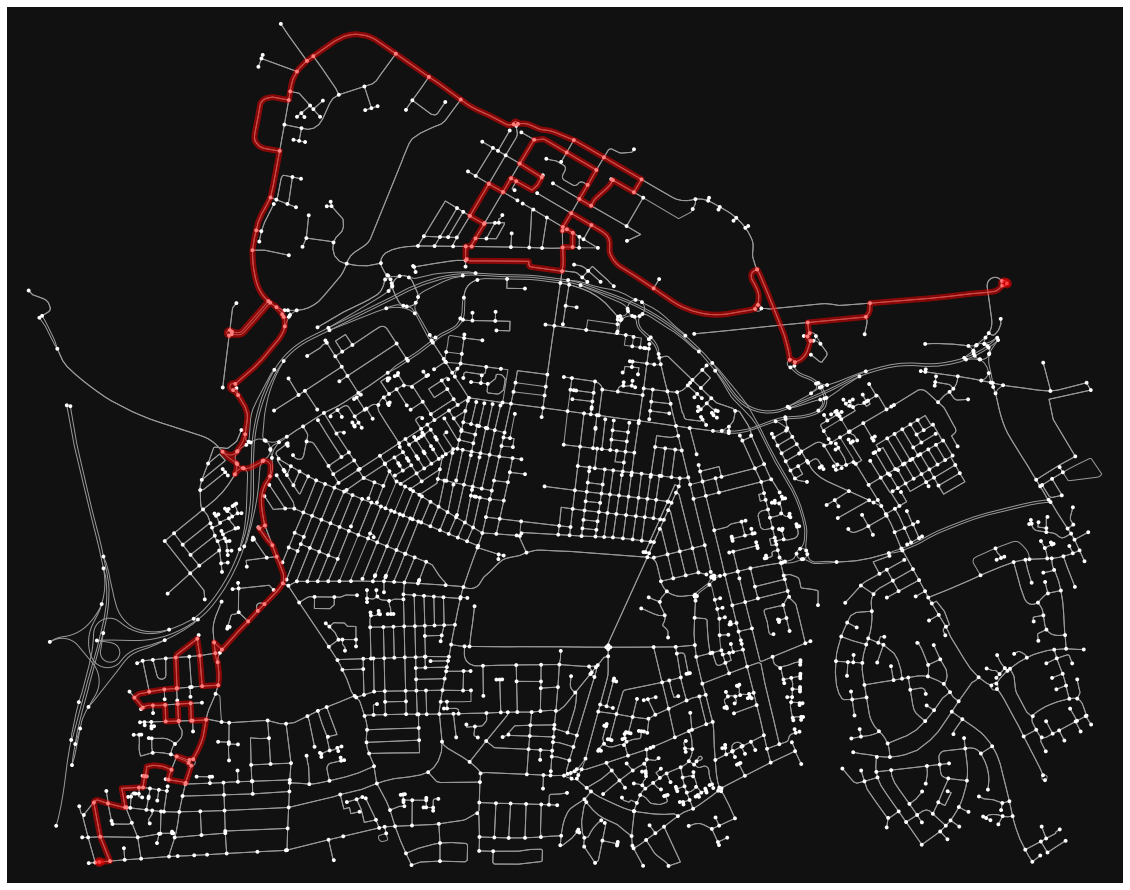

In [ ]:
# plot DFS route 
fig, ax = ox.plot_graph_route(G, dfs_path, figsize=(20, 20),route_linewidth=6)

### **Dijkstra Algorithm:** Optimal path between specified start node and end nodes 

In [ ]:
# Function to find the shortest path between two nodes
# using dijkstra search algorithm

def dijkstra_shortest_path(graph, start, end, weight):
     
    # initialize the distances dictionary and set the distance of the start node to 0
    distances = {}
    for node in graph.nodes:
        distances[node] = float('inf')
    distances[start] = 0
    
    # initialize the previous node dictionary
    previous_nodes = {}
    
    # create a priority queue to store the nodes and their distances
    # use the Python heapq module to implement the priority queue as a min heap
    queue = []
    heapq.heappush(queue, (0, start))
    
    # while the queue is not empty
    while queue:
        # get the node with the smallest distance from the queue
        current_distance, current_node = heapq.heappop(queue)
        
        # if we have reached the end node, we can return the shortest path
        if current_node == end:
            path = []
            while current_node != start:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            return path[::-1]
        
        # iterate through the neighbors of the current node
        for neighbor in graph[current_node]:
            # get the edge weight between the current node and the neighbor
            edge_weight = graph[current_node][neighbor][0][weight]
            
            # calculate the distance to the neighbor through the current node
            distance = current_distance + edge_weight
            
            # if the distance to the neighbor through the current node is shorter than the current distance to the neighbor
            if distance < distances[neighbor]:
                # update the distance to the neighbor
                distances[neighbor] = distance
                
                # set the previous node for the neighbor to the current node
                previous_nodes[neighbor] = current_node
                
                # add the neighbor to the queue with its updated distance
                heapq.heappush(queue, (distance, neighbor))

    # Return an empty path if the goal was not found
    return []
  
       
    


#####**Dijkstra Search Algorithm with distance covered as weight**


In [ ]:
# Dijkstra Search Algorithm with weight = distance covered

# Get dijkstrapath by length
dijkstrapath_by_length = dijkstra_shortest_path(G, origin_node, destination_node, 'length')

print(dijkstrapath_by_length)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 292265629, 292259969, 2136776739, 435100619, 435100833, 2136776730, 435100785, 295211131, 694179873, 294770259, 27699353, 571399376, 294770258, 694183013, 694189935, 694189930, 292262209, 292261265, 292261837, 295704828, 302022839, 7639034, 7654955, 1925285890, 7639050, 7639049, 7641680, 7641681, 4362695819, 7641694, 7654967, 7641626, 7654971, 7641625, 7652801, 7630518, 7631082, 7631085, 7631086, 704465905, 569014793, 7631089, 7631090, 7638278, 695127353, 1194138825, 695121266, 618569558, 569940189, 569940194, 833956663, 27724532, 833956651, 8880346996, 21477594, 21477615, 9815513299, 5011548816, 255404704, 255404705, 255404714, 910600593, 308036765, 308037175]


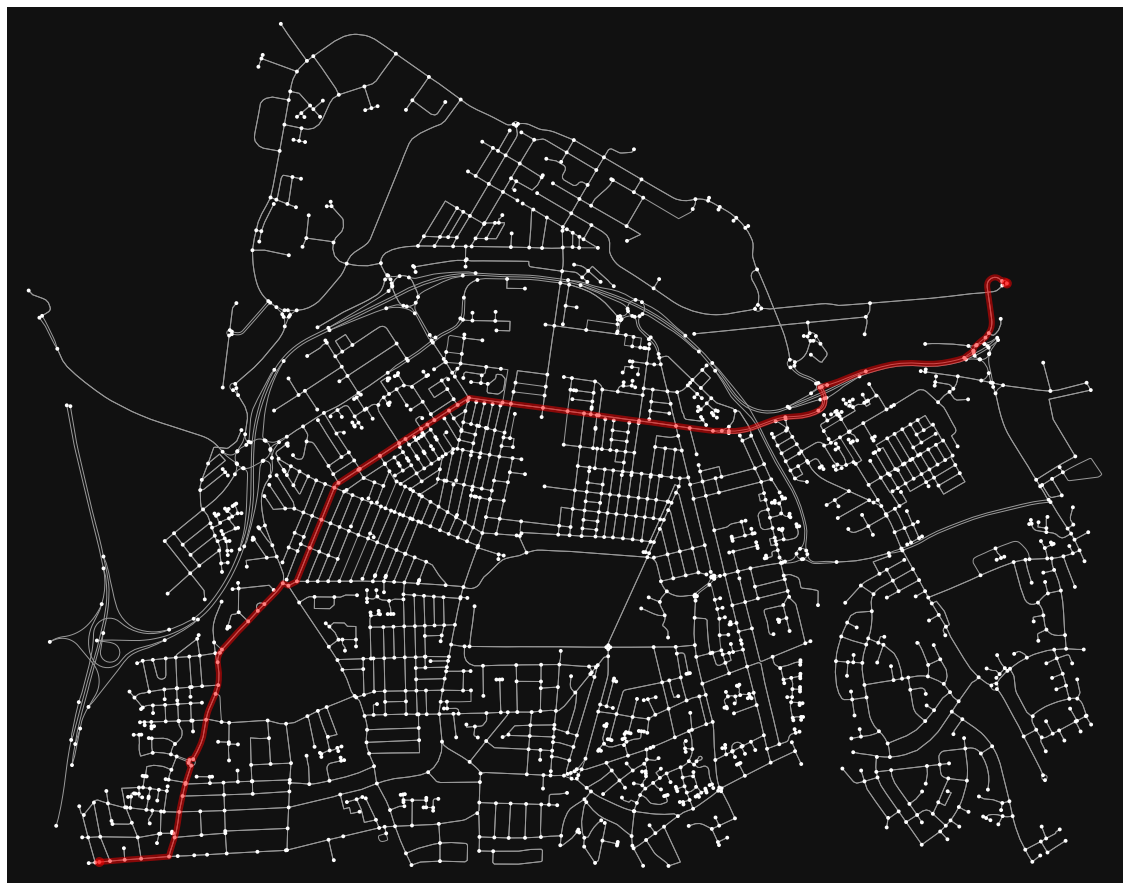

In [ ]:
# Plot the graph for the path returned
fig, ax = ox.plot_graph_route(G, dijkstrapath_by_length, figsize=(20, 20),route_linewidth=6)

##### **Dijkstra Search Algorithm with travel time as weight**

In [ ]:
# Dijkstra Search Algorithm with weight = travel time

# Get dijkstrapath by travel time
dijkstrapath_by_travel_time = dijkstra_shortest_path(G, origin_node, destination_node, 'travel_time')

print(dijkstrapath_by_travel_time)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 292265629, 292259969, 2136776739, 435100619, 435100833, 2136776730, 435100785, 295211131, 694179873, 294770259, 27699353, 571399376, 294770258, 694183013, 694189935, 694189930, 292262209, 694182846, 694182900, 694182689, 292262347, 7652373, 4545223289, 817174317, 27725106, 7652363, 4545223288, 7652365, 27698864, 7652366, 8988594632, 21477360, 414083609, 21477524, 21477535, 21477598, 21477602, 21477609, 21477594, 21477615, 9815513299, 5011548816, 255404704, 255404705, 255404714, 910600593, 308036765, 308037175]


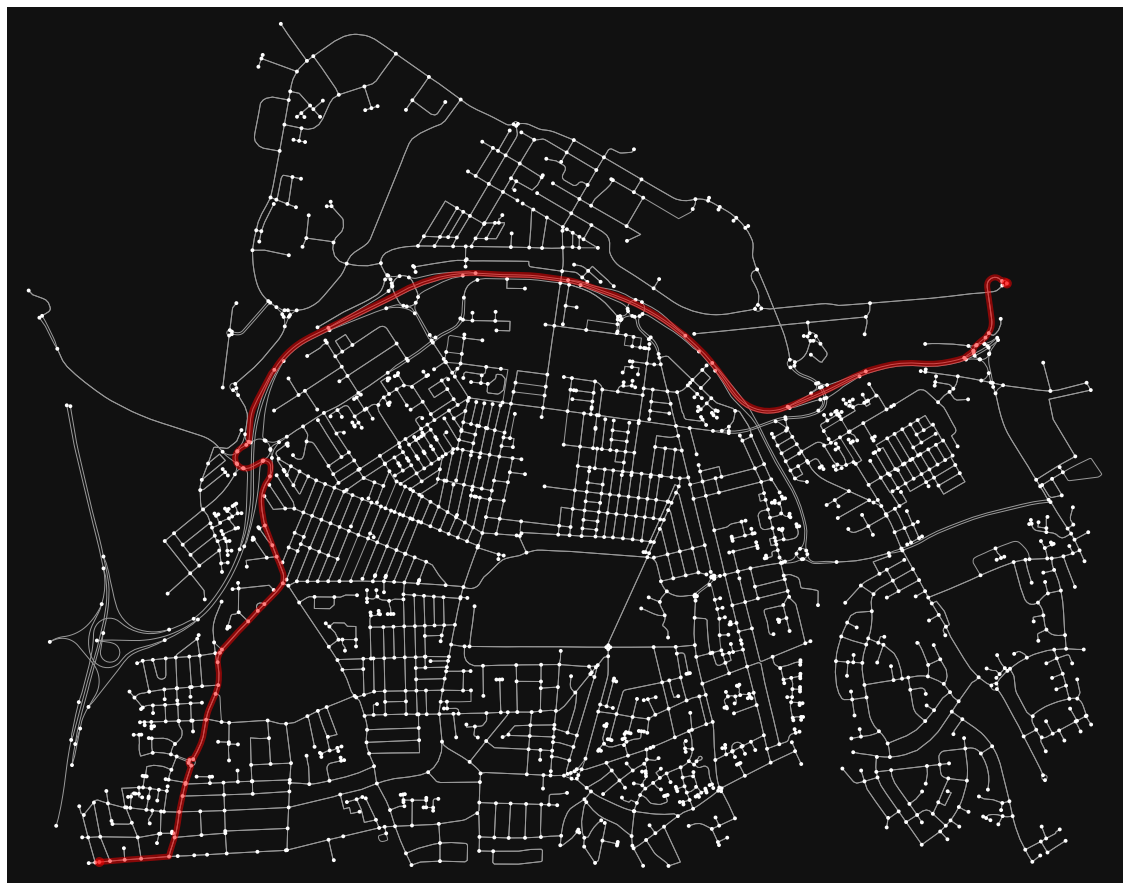

In [ ]:
# Plot the graph for the path returned
fig, ax = ox.plot_graph_route(G, dijkstrapath_by_travel_time, figsize=(20, 20),route_linewidth=6)

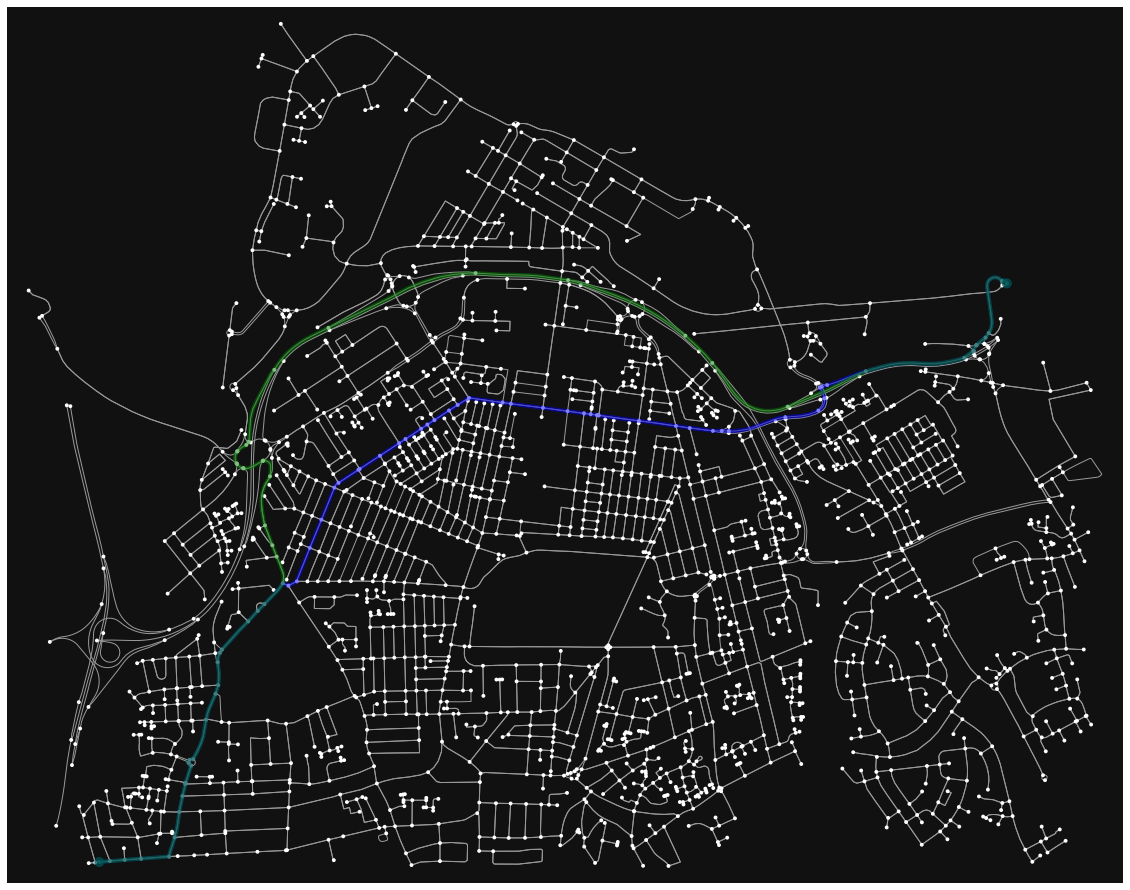

In [ ]:
# Plot the dijkstra routes together
# Green path = best dijkstrapath by travel_time
# Blue path = best dijkstrapath by distance
# The green route minimizes travel time, and is thus longer but faster than the blue route

fig, ax = ox.plot_graph_routes(
    G, routes=[dijkstrapath_by_length, dijkstrapath_by_travel_time], route_colors=["b", "g"], figsize=(20, 20), route_linewidth=6, 
)

###**A Star Algorithm:** Optimal path between specified start node and end nodes

In [ ]:
# A Star Search Algorithm with heuristic function using edge travel time as the weight


# Define euclidean distance heuristic function
def euclidean_distance(graph, node1, node2):
    x1 = graph.nodes[node1]['x']
    y1 = graph.nodes[node1]['y']
    x2 = graph.nodes[node2]['x']
    y2 = graph.nodes[node2]['y']
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Define manhattan distance heuristic function
def manhattan_distance(graph, node1, node2):
    x1 = graph.nodes[node1]['x']
    y1 = graph.nodes[node1]['y']
    x2 = graph.nodes[node2]['x']
    y2 = graph.nodes[node2]['y']
    return abs(x2 - x1) + abs(y2 - y1)

'''
The evaluation of the heuristic function is given by:

		f(n)= g(n) + h(n)

where

g(n) is a representation of the shortest cost path from the start node to node n 
h(n) is a representation of the heuristic estimation of the value of node n.
'''

# Define A Star search function with default heuristic using edge travel time as the weight
def a_star_path(graph, start, goal, heuristic=euclidean_distance):
    # Create a priority queue to store the nodes that need to be processed
    queue = []
    # Push the start node onto the queue with a priority of 0
    heappush(queue, (0, start))
    # Create a dictionary to store the costs of visiting each node
    costs = {start: 0}
    # Create a dictionary to store the parents of each node in the path
    parents = {start: None}
    # Create a set to store the nodes that have been processed
    processed = set()
    
    while queue:
        # Pop the node with the lowest cost from the queue
        current_cost, current_node = heappop(queue)
        # If the current node is the goal, construct and return the path
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
            return path[::-1]
        # Mark the current node as processed
        processed.add(current_node)
        # Get the neighbors of the current node
        for neighbor in graph.neighbors(current_node):
            # Skip the neighbor if it has already been processed
            if neighbor in processed:
                continue
            # Calculate the cost to reach the neighbor from the start (giving the g(n))
            cost = costs[current_node] + graph[current_node][neighbor][0]['travel_time']
            # If the neighbor has not been visited or the cost to reach it is lower than the current cost, update the cost and parent for the neighbor
            if neighbor not in costs or cost < costs[neighbor]:
                # Update the neighbor with the cost to reach it from the start (Update g(n) for the neighbor)
                costs[neighbor] = cost 
                # Calculate the estimated cost to reach the goal from the neighbor using the given heuristic function (Update h(n) for the neighbor)
                estimated_cost = heuristic(graph, neighbor, goal) 
                # Push the neighbor onto the queue with the total cost (cost + estimated cost) as the priority (giving f(n)= g(n) + h(n))
                heappush(queue, (cost + estimated_cost, neighbor)) 
                # Update the parent of the neighbor
                parents[neighbor] = current_node
    # Return an empty path if the goal was not found
    return []


##### **A Star Algorithm with Euclidean Distance Heuristic Function**

In [ ]:
# Get A star path with euclidean distance heuristic function
astarpath_euclidean_distance_heuristic = a_star_path(G, origin_node, destination_node, euclidean_distance)

print(astarpath_euclidean_distance_heuristic)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 292265629, 292259969, 2136776739, 435100619, 435100833, 2136776730, 435100785, 295211131, 694179873, 294770259, 27699353, 571399376, 294770258, 694183013, 694189935, 694189930, 292262209, 694182846, 694182900, 694182689, 292262347, 7652373, 4545223289, 817174317, 27725106, 7652363, 4545223288, 7652365, 27698864, 7652366, 8988594632, 21477360, 414083609, 21477524, 21477535, 21477598, 21477602, 21477609, 21477594, 21477615, 9815513299, 5011548816, 255404704, 255404705, 255404714, 910600593, 308036765, 308037175]


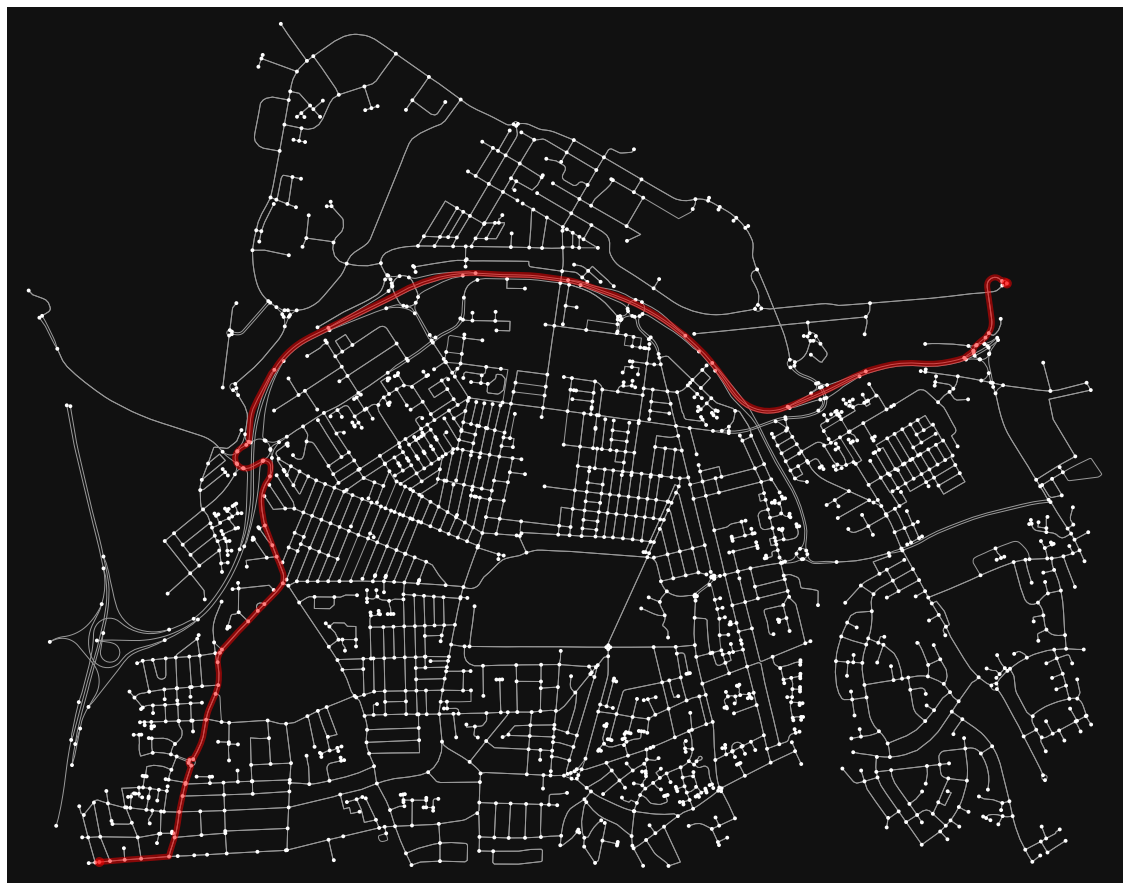

In [ ]:
# Plot the graph for the path returned
fig, ax = ox.plot_graph_route(G, astarpath_euclidean_distance_heuristic, figsize=(20, 20),route_linewidth=6)

##### **A Star Algorithm with Manhattan Distance Heuristic Function**

In [ ]:
# Get A star path with manhattan distance heuristic function
astarpath_manhattan_distance_heuristic = a_star_path(G, origin_node, destination_node, manhattan_distance)

print(astarpath_manhattan_distance_heuristic)

[435101297, 694251046, 694251011, 435101184, 435101039, 435101036, 292260540, 292265629, 292259969, 2136776739, 435100619, 435100833, 2136776730, 435100785, 295211131, 694179873, 294770259, 27699353, 571399376, 294770258, 694183013, 694189935, 694189930, 292262209, 694182846, 694182900, 694182689, 292262347, 7652373, 4545223289, 817174317, 27725106, 7652363, 4545223288, 7652365, 27698864, 7652366, 8988594632, 21477360, 414083609, 21477524, 21477535, 21477598, 21477602, 21477609, 21477594, 21477615, 9815513299, 5011548816, 255404704, 255404705, 255404714, 910600593, 308036765, 308037175]


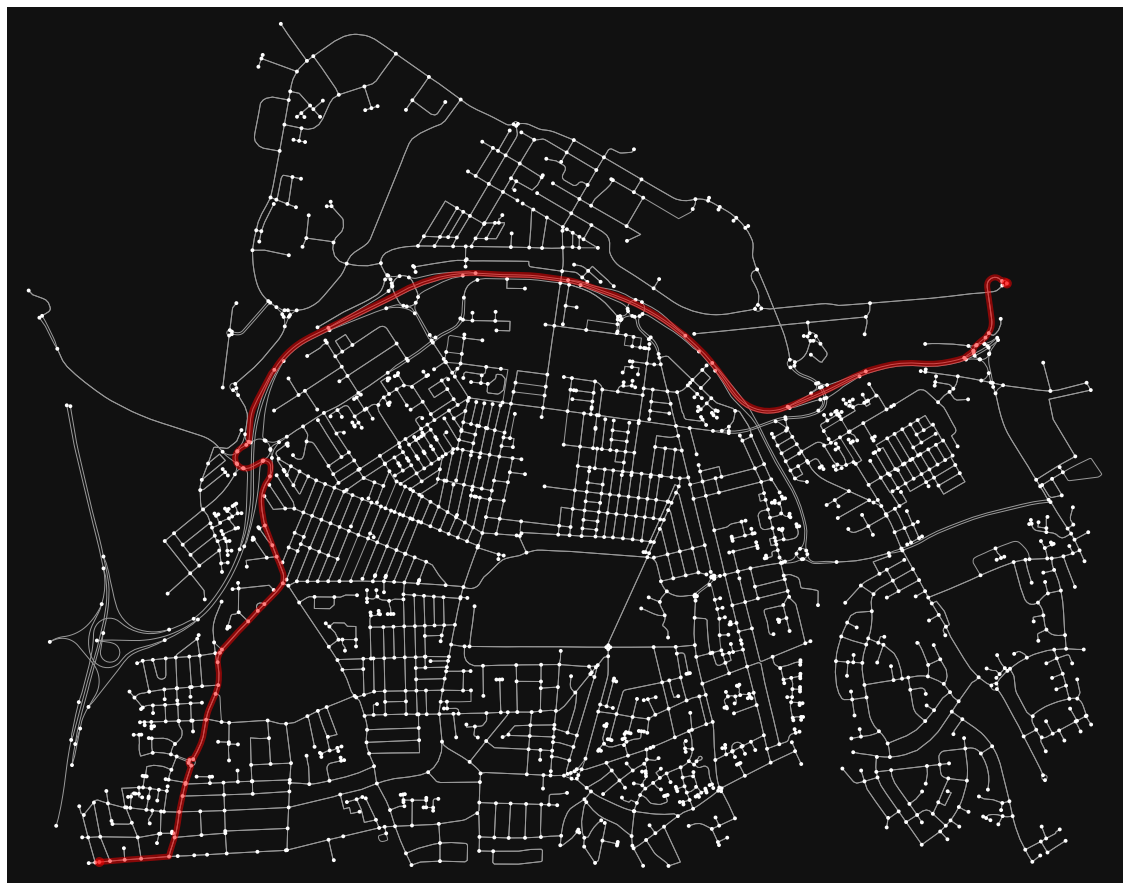

In [ ]:
# Plot the graph for the path returned
fig, ax = ox.plot_graph_route(G, astarpath_manhattan_distance_heuristic, figsize=(20, 20),route_linewidth=6)

##**Comparison of Algorithms for finding Optimal Path**

In [ ]:
# Comparing methods of finding the optimal route

# Compute distance of route by taking sum of 'length' attribute of all edges on the route
distance_of_bfs_path = int(sum(ox.utils_graph.get_route_edge_attributes(G, bfs_path, 'length')))
distance_of_dfs_path = int(sum(ox.utils_graph.get_route_edge_attributes(G, dfs_path, 'length')))
distance_of_dijkstrapath_by_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, dijkstrapath_by_length, 'length')))
distance_of_dijkstrapath_by_travel_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, dijkstrapath_by_travel_time, 'length')))
distance_of_astarpath_euclidean_distance_heuristic = int(sum(ox.utils_graph.get_route_edge_attributes(G, astarpath_euclidean_distance_heuristic, 'length')))
distance_of_astarpath_manhattan_distance_heuristic = int(sum(ox.utils_graph.get_route_edge_attributes(G, astarpath_manhattan_distance_heuristic, 'length')))



In [ ]:
# Compute travel time of route by taking sum of 'travel_time'attribute of all edges on the route

time_taken_bfs_path = int(sum(ox.utils_graph.get_route_edge_attributes(G, bfs_path, 'travel_time')))
time_taken_dfs_path = int(sum(ox.utils_graph.get_route_edge_attributes(G, dfs_path, 'travel_time')))
time_taken_dijkstrapath_by_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, dijkstrapath_by_length, 'travel_time')))
time_taken_dijkstrapath_by_travel_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, dijkstrapath_by_travel_time, 'travel_time')))
time_taken_astarpath_euclidean_distance_heuristic = int(sum(ox.utils_graph.get_route_edge_attributes(G, astarpath_euclidean_distance_heuristic, 'travel_time')))
time_taken_astarpath_manhattan_distance_heuristic = int(sum(ox.utils_graph.get_route_edge_attributes(G, astarpath_manhattan_distance_heuristic, 'travel_time')))


In [ ]:
# Compute average speed for each method of finding optimal route

ave_speed_BFSpath = distance_of_bfs_path/time_taken_bfs_path
ave_speed_DFSpath = distance_of_dfs_path/time_taken_dfs_path
ave_speed_Dijkstrapath_by_length = distance_of_dijkstrapath_by_length/time_taken_dijkstrapath_by_length
ave_speed_Dijkstrapath_by_travel_time = distance_of_dijkstrapath_by_travel_time/time_taken_dijkstrapath_by_travel_time
ave_speed_Astarpath_euclidean_distance_heuristic = distance_of_astarpath_euclidean_distance_heuristic/time_taken_astarpath_euclidean_distance_heuristic
ave_speed_Astarpath_manhattan_distance_heuristic = distance_of_astarpath_manhattan_distance_heuristic/time_taken_astarpath_manhattan_distance_heuristic


In [ ]:
#Print Results

print('BFS path has a distance of', distance_of_bfs_path, 'meters and takes', time_taken_bfs_path, 'seconds, with an average speed of %.2f m/s.' % ave_speed_BFSpath)
print('DFS path has a distance of', distance_of_dfs_path, 'meters and takes', time_taken_dfs_path, 'seconds, with an average speed of %.2f m/s.' % ave_speed_DFSpath)
print('Dijkstra path by length has a distance of', distance_of_dijkstrapath_by_length, 'meters and takes', 
      time_taken_dijkstrapath_by_length, 'seconds, with an average speed of %.2f m/s.' % ave_speed_Dijkstrapath_by_length)
print('Dijkstra path by travel_time has a distance of', distance_of_dijkstrapath_by_travel_time, 'meters and takes', 
      time_taken_dijkstrapath_by_travel_time, 'seconds, with an average speed of %.2f m/s.' % ave_speed_Dijkstrapath_by_travel_time)
print('A star path with euclidean distance heuristic function has a distance of', distance_of_astarpath_euclidean_distance_heuristic, 'meters and takes', 
      time_taken_astarpath_euclidean_distance_heuristic, 'seconds, with an average speed of %.2f m/s.' % ave_speed_Astarpath_euclidean_distance_heuristic)
print('A star path with manhattan distance heuristic function has a distance of', distance_of_astarpath_manhattan_distance_heuristic, 'meters and takes', 
      time_taken_astarpath_manhattan_distance_heuristic, 'seconds, with an average speed of %.2f m/s.' % ave_speed_Astarpath_manhattan_distance_heuristic)

BFS path has a distance of 7761 meters and takes 601 seconds, with an average speed of 12.91 m/s.
DFS path has a distance of 14957 meters and takes 1152 seconds, with an average speed of 12.98 m/s.
Dijkstra path by length has a distance of 6077 meters and takes 437 seconds, with an average speed of 13.91 m/s.
Dijkstra path by travel_time has a distance of 7170 meters and takes 416 seconds, with an average speed of 17.24 m/s.
A star path with euclidean distance heuristic function has a distance of 7170 meters and takes 416 seconds, with an average speed of 17.24 m/s.
A star path with manhattan distance heuristic function has a distance of 7170 meters and takes 416 seconds, with an average speed of 17.24 m/s.


####**The optimal path was found in three instances using variations of Dijkstra and A-Star Algorithms. These includes:**



*   **Dijkstra Algorithm with weight = 'travel_time'**
*   **A-Star Algorithm with weight = 'travel_time' using euclidean distance heuristic function**
*   **A-Star Algorithm with weight = 'travel_time' using manhattan distance heuristic function**



In [ ]:
# Compute results in a dataframe

optimal_route_method = ['BFS', 'DFS' , 'Dijkstra by distance', 'Dijkstra by travel_time', 
                        'A star with euclidean distance heuristic function', 'A star with manhattan distance heuristic function' ]
distance = [distance_of_bfs_path, distance_of_dfs_path, distance_of_dijkstrapath_by_length, distance_of_dijkstrapath_by_travel_time, 
            distance_of_astarpath_euclidean_distance_heuristic, distance_of_astarpath_manhattan_distance_heuristic]
time_taken = [time_taken_bfs_path, time_taken_dfs_path, time_taken_dijkstrapath_by_length, time_taken_dijkstrapath_by_travel_time, 
              time_taken_astarpath_euclidean_distance_heuristic, time_taken_astarpath_manhattan_distance_heuristic]
ave_speed = [ave_speed_BFSpath, ave_speed_DFSpath, ave_speed_Dijkstrapath_by_length, ave_speed_Dijkstrapath_by_travel_time, 
             ave_speed_Astarpath_euclidean_distance_heuristic, ave_speed_Astarpath_manhattan_distance_heuristic]


results_list = list(zip(optimal_route_method, distance,time_taken,ave_speed))
pd.set_option('max_colwidth', None)
df = pd.DataFrame(results_list, columns = ['Optimal_route_method', 'Distance(m)', 'Time(s)', 'Average Speed(m/s)'])
df['Average Speed(m/s)'] = df['Average Speed(m/s)'].round(decimals = 2)
#df.reset_index(drop=True, inplace=True)
df.sort_values(by = 'Average Speed(m/s)', ascending = False)






Optimal_route_method  Distance(m)  Time(s)  \
3                            Dijkstra by travel_time         7170      416   
4  A star with euclidean distance heuristic function         7170      416   
5  A star with manhattan distance heuristic function         7170      416   
2                               Dijkstra by distance         6077      437   
1                                                DFS        14957     1152   
0                                                BFS         7761      601   

   Average Speed(m/s)  
3               17.24  
4               17.24  
5               17.24  
2               13.91  
1               12.98  
0               12.91

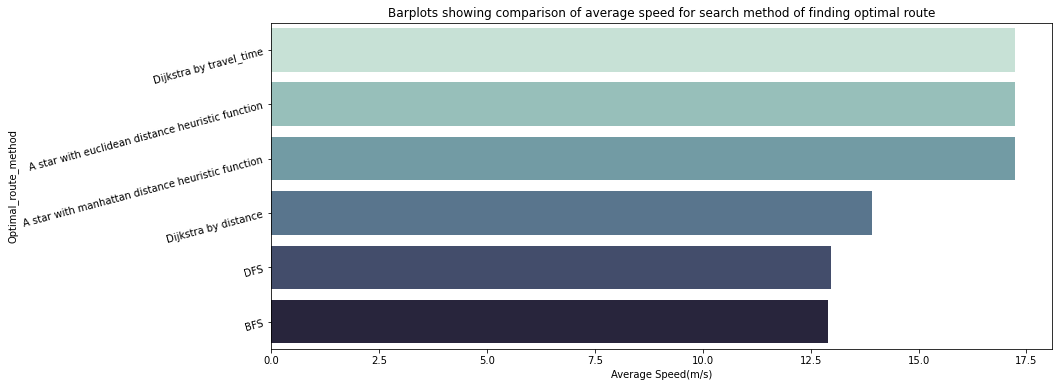

In [ ]:
# Barplots showing Comparison of Average Speed (performance) of search methods in finding optimal route


plt.figure(figsize = (14,6))
sns.barplot(x=df['Average Speed(m/s)'],
            y=df['Optimal_route_method'], data=df,
            order=df.sort_values(by = 'Average Speed(m/s)', ascending = False).Optimal_route_method,
            palette="ch:start=.2,rot=-.39")
plt.title('Barplots showing comparison of average speed for search method of finding optimal route')
plt.yticks(rotation=15)
plt.show()

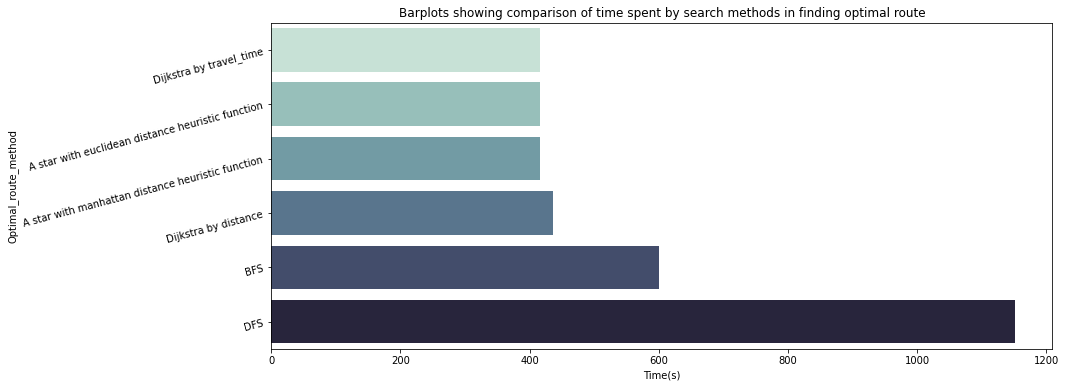

In [ ]:
# Barplots showing Comparison of time spent (time complexity) by search methods in finding optimal route


plt.figure(figsize = (14,6))
sns.barplot(x=df['Time(s)'],
            y=df['Optimal_route_method'], data=df,
            order=df.sort_values(by = 'Time(s)').Optimal_route_method,
            palette="ch:start=.2,rot=-.39")
plt.title('Barplots showing comparison of time spent by search methods in finding optimal route')
plt.yticks(rotation=15)
plt.show()

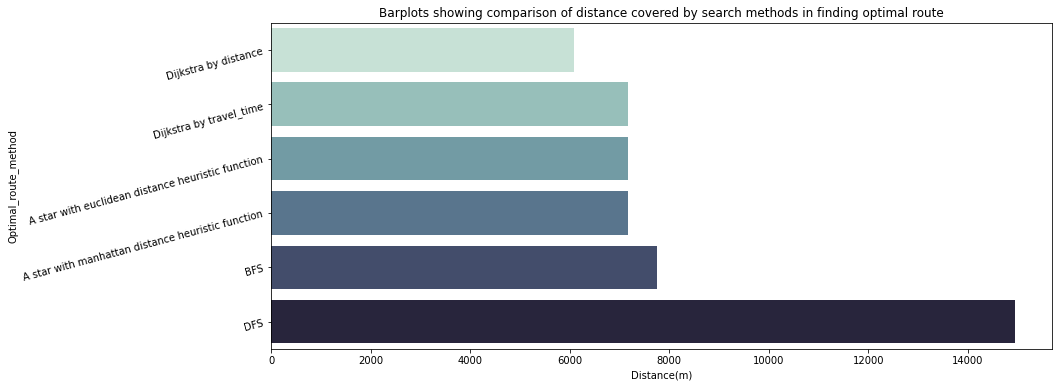

In [ ]:
# Barplots showing Comparison of distance covered (space complexity) by search methods in finding optimal route


plt.figure(figsize = (14,6))
sns.barplot(x=df['Distance(m)'],
            y=df['Optimal_route_method'], data=df,
            order=df.sort_values(by = 'Distance(m)').Optimal_route_method,
            palette="ch:start=.2,rot=-.39")
plt.title('Barplots showing comparison of distance covered by search methods in finding optimal route')
plt.yticks(rotation=15)
plt.show()